In [12]:
def fizzbar(x):
    if x%3 == 0 and x%5 == 0:
        print(x, "fizzbuzz")
    elif x%3 == 0:
        print(x, "fizz")
    elif x%5 == 0:
        print(x, "buzz")
    else:
        return

fizzbar(30)          

30 fizzbuzz


In [14]:
def fizzbar(x):
    for x in range(x+1):
        if x == 0:
            print("")
        elif x%3 == 0 and x%5 == 0:
            print(x, "fizzbuzz")
        elif x%3 == 0:
            print(x, "fizz")
        elif x%5 == 0:
            print(x, "buzz")

fizzbar(45)


3 fizz
5 buzz
6 fizz
9 fizz
10 buzz
12 fizz
15 fizzbuzz
18 fizz
20 buzz
21 fizz
24 fizz
25 buzz
27 fizz
30 fizzbuzz
33 fizz
35 buzz
36 fizz
39 fizz
40 buzz
42 fizz
45 fizzbuzz


Gini Index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.



Decision Trees

In [15]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [16]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [49]:
model = tree.DecisionTreeClassifier(max_depth=7, random_state=42, min_impurity_decrease=0.01)


In [50]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       151
           1       0.57      0.75      0.65        80

    accuracy                           0.72       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.72      0.72       231



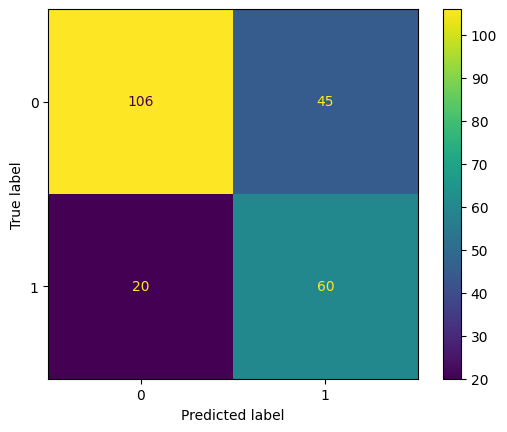

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

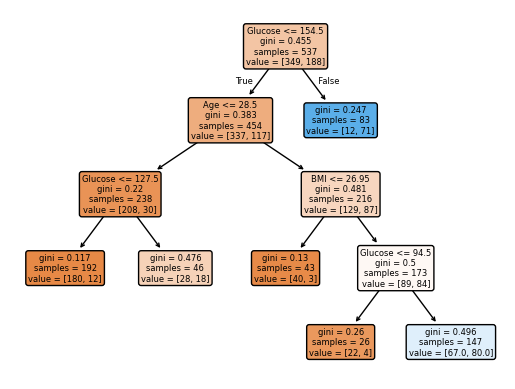

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [57]:
def sort_names(names):
        print(", ".join(names[:-1]) + f" & {names[-1]}")

names = ["Niles", "C.C", "Fran"]
sort_names(names)
        

Niles, C.C & Fran


Underfitting is when a data set is too complex for a model to perform with, while overfitting is when a data set isn't complex enough, which results in 
poor predictions for data. To avoid them, you can increase/decrease features. Overfitting has high variance and low bias, vice versa for underfitting. 

Data sets that are too complex for a model experience underfitting, while data sets that aren't complex enough experience overfitting. 

A technique used to evaluate the performance of a model and select the best one for a specific task. 

10/31

In [5]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)
#standardize

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
         

0.7532467532467533

In [13]:
print(rf.feature_importances_, X.columns)

[0.08055242 0.28208895 0.08405168 0.07055914 0.0693849  0.15811963
 0.11312693 0.14211636] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


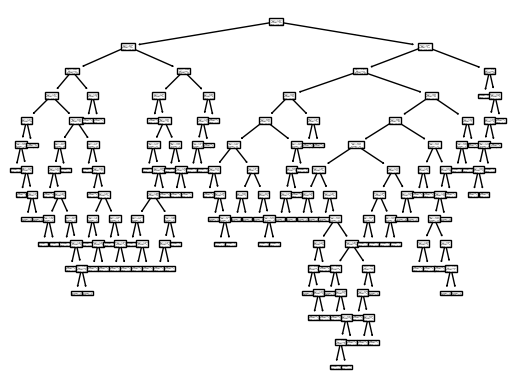

In [17]:
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

In [18]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 2.1/124.9 MB 6.2 MB/s eta 0:00:20
   - -------------------------------------- 3.7/124.9 MB 6.6 MB/s eta 0:00:19
   - -------------------------------------- 6.0/124.9 MB 7.8 MB/s eta 0:00:16
   -- ------------------------------------- 7.9/124.9 MB 8.1 MB/s eta 0:00:15
   --- ------------------------------------ 9.4/124.9 MB 7.9 MB/s eta 0:00:15
   --- ------------------------------------ 10.5/124.9 MB 7.6 MB/s eta 0:00:16
   --- ------------------------------------ 11.3/124.9 MB 7.3 MB/s eta 0:00:16
   --- ------------------------------------ 12.3/124.9 MB 6.8 MB/s eta 0:00:17
   ---- ----------------------------------- 13.1/124.9 MB 6.5 MB/s eta 0:00:18
   ---- ----------------------------------- 13.6/124.9 MB 6.2 MB/s eta 0:00:18
   ---- ----------------------------------- 14.2/124.9 MB 5.8 MB/s


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

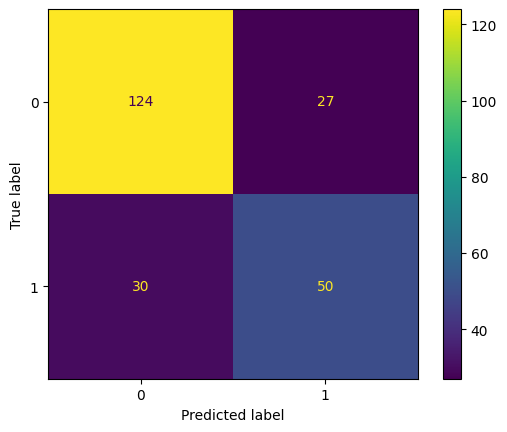

In [22]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
#Roc- Recieving, Operations, Characteristic curve 
#Roc summarizes the tradeoff between true positives and false positives, most appropriate for balanced data sets. Can be overly optimistic for 
#unblanaced classification problems. 

print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.17880795 1.        ] [0.    0.625 1.   ]


np.float64(0.7230960264900662)

Text(0, 0.5, 'Tpr')

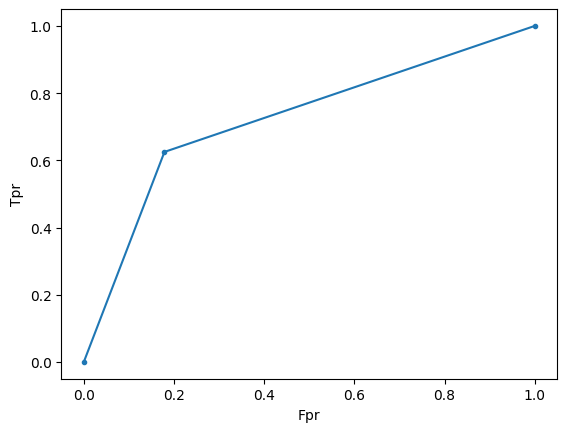

In [29]:
plt.plot(fpr, tpr, marker = ".")
plt.xlabel("Fpr")
plt.ylabel("Tpr")

In [31]:
#precision/recall curve summarizes the tradeofff between tpr and fpr, ideal for imbalanced data.

from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
pr_auc

np.float64(0.7021103896103896)

Text(0, 0.5, 'Precision')

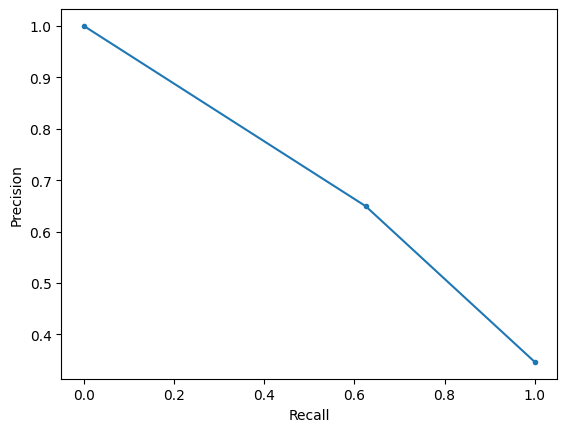

In [32]:
plt.plot(recall, precision, marker = ".")
plt.xlabel("Recall")
plt.ylabel("Precision")


In [33]:
# f1_scores combines precision and recall scores, used to compute how many times the model made a correct prediction for the whole data set.

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.6369426751592356)